# IE 582
## HOMEWORK 1
### QUESTION 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
# read data
# specify target column name
data = pd.read_csv('HousingData.csv')
target = 'MEDV'

In [3]:
# print first five rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
# store NA Columns in na_cols
na_cols = data.columns[data.isna().any()].tolist()

In [5]:
# check datatype of columns with missing data
data[na_cols].dtypes

CRIM     float64
ZN       float64
INDUS    float64
CHAS     float64
AGE      float64
LSTAT    float64
dtype: object

In [6]:
# a method to fill in mean for numerical columns' missing data
# fill na with mean value of the column
def fill_na(df, na):
    for i in na:
        temp = df[i]
        means = temp.mean()
        temp = temp.fillna(means)
        df[i] = temp
    return df
data_noNA = fill_na(data, na_cols)
# check if the fillna method worked
data_noNA_nacol = data_noNA.columns[data_noNA.isna().any()].tolist()

if len(data_noNA_nacol) == 0:
    print('no na detected')
else:
    print('{} na detected'.format(data_noNA_nacol))

no na detected


#### Scatter Plot
CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO, LSTA have a negative correlation with MEDV while the rest shows a positive correlation with the label.

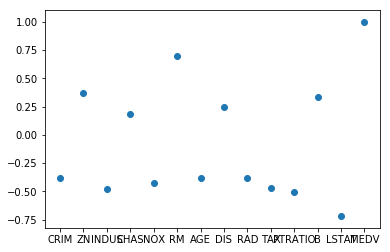

In [23]:
# print correlation between each feature and response variable
plt.scatter(x=data_noNA.columns.tolist(), y=data_noNA.corr()[target][:])


#### Model Fitting
Fitting the model using statsmodels OLS method, intercepts can be seen from the report below.

In [8]:
# split x and y
# fit model with all features
x = data_noNA[[i for i in data_noNA.columns.tolist() if i != target]]
y = data_noNA[target]
model = sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              872.2
Date:                Fri, 20 Sep 2019   Prob (F-statistic):                        0.00
Time:                        09:12:23   Log-Likelihood:                         -1529.0
No. Observations:                 506   AIC:                                      3084.
Df Residuals:                     493   BIC:                                      3139.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0953      0.034     -2.779      0.006      -0.163      -0.028
ZN             0.0452      0.014      3.143      0.002       0.017       0.074
INDUS         -0.0468      0.064     -0.735      0.463      -0.172       0.078
CHAS           3.1345      0.924      3.392      0.001       1.319       4.950
NOX           -2.9625      3.318     -0.893      0.372      -9.481       3.556
RM             6.0518      0.307     19.714      0.000       5.449       6.655
AGE           -0.0159      0.013     -1.176      0.240      -0.042       0.011
DIS           -1.0043      0.192     -5.237      0.000      -1.381      -0.628
RAD            0.1499      0.067      2.227      0.026       0.018       0.282
TAX           -0.0083      0.004     -2.110      0.035      -0.016      -0.001
PTRATIO       -0.4017      0.112     -3.600      0.000      -0.621      -0.182
B              0.0147      0.003      5.381      0.000       0.009       0.020
LSTAT         -0.3724      0.050     -7.452      0.000      -0.471      -0.274
==============================================================================
Omnibus:                      209.147   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1461.565
Skew:                           1.644   Prob(JB):                         0.00
Kurtosis:                      10.649   Cond. No.                     8.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Feature Selection
In this section, we try to drop features to improve performance of the model; 3 drop feature methods are made for performance measure AIC, BIC, adjusted r-square respectively. Assuming independence between features, we drop features one by one until the performance measure stops improving. 

In [24]:
# store statistics of the original model
original_aic = results.aic
original_bic = results.bic
original_rsqr = results.rsquared_adj
print('original AIC: {}, original BIC: {}, original adjusted r-square: {}'.format(original_aic,original_bic,original_rsqr))

original AIC: 3084.0411849764632, original BIC: 3138.9861616772005, original adjusted r-square: 0.9572354030072374


In [13]:
# drop feature recursively
# using aic as performance measure

def eliminate_feature_aic(x, y, original_aic):
    summary = {}
    for i in x.columns.tolist():
        x_temp = x[[k for k in x.columns.tolist() if k != i]]
        model_temp = sm.OLS(y,x_temp)
        results_temp = model_temp.fit()
        temp_aic = results_temp.aic
        summary[i] = temp_aic
    minimum = original_aic
    for i in summary.keys():
        aic = summary[i]
        if aic < minimum:
            minimum = aic
            min_feature = i
    try:
        print('min aic is when dropping column: {} resulting aic: {}'.format(min_feature, minimum))
    except:
        print('loop ended, min aic reached')
        return x
    x = x[[k for k in x.columns.tolist() if k != min_feature]]
    
#     if dropped feature > 3 stop and return
    if len(x.columns.tolist()) <= 10:
        return x
    
    original_aic = minimum
    return eliminate_feature_aic(x, y, original_aic)


new_x = eliminate_feature_aic(x, y, original_aic)
print('new data shape is {}'.format(new_x.shape))

min aic is when dropping column: INDUS resulting aic: 3082.59543235594
min aic is when dropping column: NOX resulting aic: 3081.858144435004
loop ended, min aic reached
new data shape is (506, 11)


In [26]:
# drop feature recursively
# using bic as performance measure

def eliminate_feature_bic(x, y, original_bic):
    summary = {}
    for i in x.columns.tolist():
        x_temp = x[[k for k in x.columns.tolist() if k != i]]
        model_temp = sm.OLS(y,x_temp)
        results_temp = model_temp.fit()
        temp_bic = results_temp.bic
        summary[i] = temp_bic
    minimum = original_bic
    for i in summary.keys():
        bic = summary[i]
        if bic < minimum:
            minimum = bic
            min_feature = i
    try:
        print('min aic is when dropping column: {} resulting bic: {}'.format(min_feature, minimum))
    except:
        print('loop ended, min bic reached')
        return x
    
    x = x[[k for k in x.columns.tolist() if k != min_feature]]
    if len(x.columns.tolist()) <= 10:
        return x
    
    original_bic = minimum
    return eliminate_feature_bic(x, y, original_bic)


new_x = eliminate_feature_bic(x, y, original_bic)
print('new data shape is {}'.format(new_x.shape))

min aic is when dropping column: INDUS resulting bic: 3133.3138723873894
min aic is when dropping column: NOX resulting bic: 3128.350047797166
min aic is when dropping column: AGE resulting bic: 3124.5497229731527
new data shape is (506, 10)


In [15]:
# drop feature recursively
# using adjusted r-squared as performance measure

def eliminate_feature_rs(x, y,original_rsqr):
    summary = {}
    for i in x.columns.tolist():
        x_temp = x[[k for k in x.columns.tolist() if k != i]]
        model_temp = sm.OLS(y,x_temp)
        results_temp = model_temp.fit()
        temp_rsqr = results_temp.rsquared_adj
        summary[i] = temp_rsqr
        
    maximum = original_rsqr
    for i in summary.keys():
        r_sqr = summary[i]
        if r_sqr > maximum:
            maximum = r_sqr
            max_feature = i
    try:
        print('highest rsquare-adj is when dropping column: {} resulting adjusted r-square: {}'.format(max_feature, maximum))
    except:
        print('loop ended, reached highest adjusted r-square')
        return x
    
    x = x[[k for k in x.columns.tolist() if k != max_feature]]
    if len(x.columns.tolist()) <= 10:
        return x
    original_rsqr = maximum
    return eliminate_feature_rs(x, y, original_rsqr)


new_x = eliminate_feature_rs(x, y,original_rsqr)
print('new data shape is {}'.format(new_x.shape))

highest rsquare-adj is when dropping column: INDUS resulting adjusted r-square: 0.9572751980029789
loop ended, reached highest adjusted r-square
new data shape is (506, 12)


It is obvious that using AIC, INDUS and NOX are dropped; using BIC, INDUS, NOX and AGE are dropped; using adjusted R-square, only INDUS is dropped. The result is consistent with the statistics of the fitted linear model; INDUS, NOX and AGE has high p-value and should be dropped. 